# Analyzing Features

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.model_selection import train_test_split
import itertools

In [2]:
df = pd.read_csv('finalDF.csv',index_col=0)
df = df.drop(columns=['glucose'])
display(df.head())
df = df[df.range < 500]

,hadm_id,subject_id,expire_flag,admission_type,elix_score,age,admission_type_encoded,glucose_readings,0,1,...,21,22,23,24,25,26,27,28,29,range
0,137275,9319,0,ELECTIVE,12,82,0,45,118.0,97.0,...,133.0,142.0,142.0,99.0,99.0,98.0,126.0,109.0,109.0,82.0
1,125380,31585,0,EMERGENCY,7,300,1,10,118.0,127.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
2,132722,1426,0,EMERGENCY,5,80,1,9,104.0,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0
3,101422,71582,0,EMERGENCY,0,76,1,21,106.0,134.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0
4,139687,68501,0,ELECTIVE,10,86,0,5,162.0,180.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0


In [3]:
from sklearn.utils import resample
df_majority = df[df.expire_flag==0]
df_minority = df[df.expire_flag==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,   
                                 n_samples=3000,     
                                 random_state=123) 

df_majority_downsampled = resample(df_majority, 
                                 replace=False, 
                                 n_samples=5000,     
                                 random_state=123) 

df_resampled = pd.concat([df_minority_upsampled, df_majority_downsampled])

In [8]:
pydf = df_resampled.values
print(pydf.shape)
X = pydf[:,4:39]
y = df_resampled['expire_flag']

(8000, 39)


# Feature Importance

Feature ranking:
1. feature 0 (0.096655)
2. feature 1 (0.070946)
3. feature 4 (0.055291)
4. feature 34 (0.053272)
5. feature 6 (0.047040)
6. feature 5 (0.044235)
7. feature 7 (0.040838)
8. feature 3 (0.040271)
9. feature 8 (0.037829)
10. feature 9 (0.034185)
11. feature 11 (0.029804)
12. feature 10 (0.029714)
13. feature 2 (0.027794)
14. feature 12 (0.027614)
15. feature 13 (0.024833)
16. feature 14 (0.024716)
17. feature 15 (0.024074)
18. feature 17 (0.020935)
19. feature 18 (0.020031)
20. feature 16 (0.019638)
21. feature 23 (0.018569)
22. feature 19 (0.018562)
23. feature 20 (0.017988)
24. feature 21 (0.017546)
25. feature 22 (0.017447)
26. feature 25 (0.015813)
27. feature 33 (0.014995)
28. feature 24 (0.014979)
29. feature 28 (0.014909)
30. feature 32 (0.014756)
31. feature 31 (0.014391)
32. feature 29 (0.013781)
33. feature 27 (0.012989)
34. feature 26 (0.011963)
35. feature 30 (0.011599)


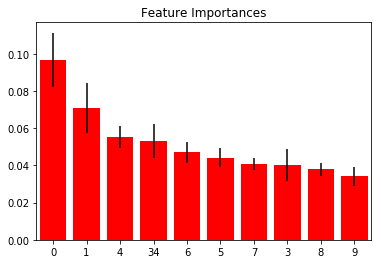

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

XImp = pydf[:,4:39]
yImp = pydf[:,2]
xImp = np.asarray(XImp,dtype=np.float64)
yImp = np.asarray(yImp,dtype=np.float64)
forest = ExtraTreesClassifier()
forest.fit(XImp,yImp)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(35):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-.5, 9.5])
plt.savefig('feature_importance.png')
plt.show()

# Feature Correlation via Heatmap

In [ ]:
import seaborn as sns
d = df[['0','1','2','3','4','5','6','7','8','9','10','11','12','13',
       '14','15','16','17','18','19','20','21','22','23','24','25','26','27',
        '28','29']].copy()
corr = d.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

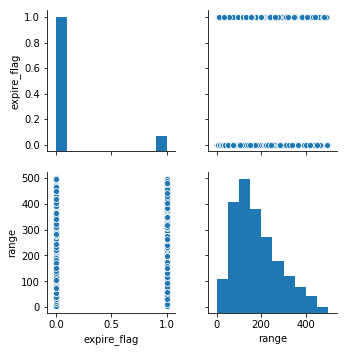

In [17]:
a = df[['expire_flag','range']].copy()
g = sns.pairplot(a)

In [9]:
pd.options.display.max_rows = 4000

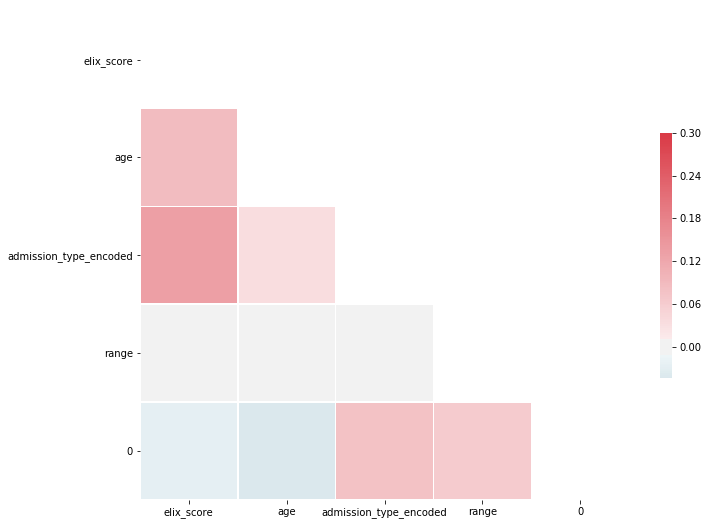

In [13]:
import seaborn as sns
d = df[['elix_score','age','admission_type_encoded','range','0']].copy()
corr = d.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns_plot.figure.savefig("heatmap.png")